In [ ]:
import pandas as pd

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/data/d_test.csv')
train = pd.read_csv('/content/drive/MyDrive/data/d_train.csv')

In [ ]:
sub = pd.read_csv('/content/drive/MyDrive/data/sample_submission.csv')

In [ ]:
train.shape, test.shape

((30200, 14), (12943, 13))

In [ ]:
train.head().T

,0,1,2,3,4
ID,TRAIN_00000,TRAIN_00001,TRAIN_00002,TRAIN_00003,TRAIN_00004
가입일,329,2,93,223,222
음성사서함이용,0,80,28,1,0
주간통화시간,99.2,323.9,282.4,221.4,96.3
주간통화횟수,93,323,323,223,222
주간통화요금,27.3,83.7,34.2,25.1,28.7
저녁통화시간,268.8,269.4,207.0,233.0,223.9
저녁통화횟수,68,326,322,61,69
저녁통화요금,28.92,32.09,32.82,23.9,28.08
밤통화시간,262.9,322.8,280.8,203.8,263.1


In [ ]:
def 요약(df):
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index().rename(columns={'index':'피쳐'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고유값 개수'] = df.nunique().values
    summary['첫번째 값'] = df.loc[0].values
    summary['두번째 값'] = df.loc[1].values
    summary['세번째 값'] = df.loc[2].values    
    return summary
요약(train)

,피쳐,데이터 타입,결측값 개수,고유값 개수,첫번째 값,두번째 값,세번째 값
0,ID,object,0,30200,TRAIN_00000,TRAIN_00001,TRAIN_00002
1,가입일,int64,0,345,329,2,93
2,음성사서함이용,int64,0,76,0,80,28
3,주간통화시간,float64,0,2771,99.2,323.9,282.4
4,주간통화횟수,int64,0,239,93,323,323
5,주간통화요금,float64,0,735,27.3,83.7,34.2
6,저녁통화시간,float64,0,2606,268.8,269.4,207.0
7,저녁통화횟수,int64,0,241,68,326,322
8,저녁통화요금,float64,0,1840,28.92,32.09,32.82
9,밤통화시간,float64,0,2545,262.9,322.8,280.8


In [ ]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 28.3 MB/s eta 0:00:00


In [ ]:
import matplotlib as plt

AttributeError: ignored

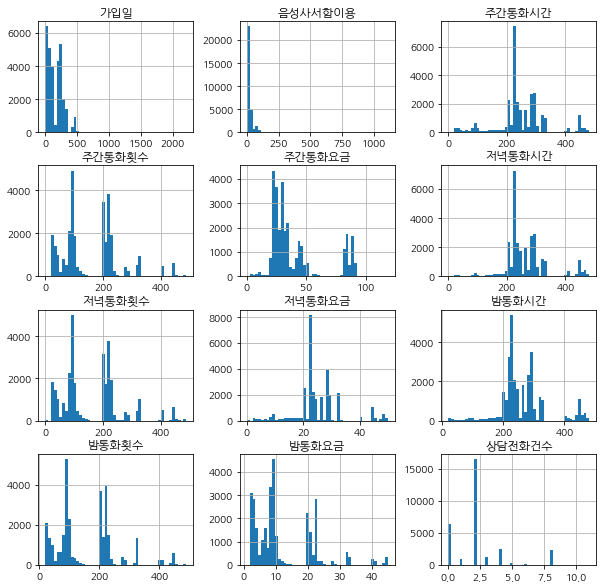

In [ ]:
train.drop(['전화해지여부'], axis=1).hist(bins=50, figsize=(10, 10))
plt.show()

In [ ]:
label_name = '전화해지여부'
X = train.drop(columns=['ID', label_name])
y = train[label_name]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#min-max 정규화 객체 생성
scaler = MinMaxScaler()

#min-max 정규화 적용
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled

array([[1.48349163e-01, 0.00000000e+00, 2.05851836e-01, ...,
        6.55319149e-01, 7.24852071e-01, 1.81818182e-01],
       [4.52284034e-04, 7.19424460e-02, 6.72131148e-01, ...,
        4.02127660e-01, 7.11879836e-01, 1.81818182e-01],
       [4.16101312e-02, 2.51798561e-02, 5.86013696e-01, ...,
        6.55319149e-01, 1.64770141e-01, 0.00000000e+00],
       ...,
       [1.04025328e-02, 0.00000000e+00, 4.61506537e-01, ...,
        1.59574468e-01, 7.23714156e-02, 1.81818182e-01],
       [2.80416101e-02, 8.99280576e-04, 5.44511309e-01, ...,
        3.97872340e-01, 4.51524807e-01, 1.81818182e-01],
       [9.00045228e-02, 8.99280576e-04, 6.78771529e-01, ...,
        6.44680851e-01, 1.19253528e-01, 0.00000000e+00]])

In [ ]:
test = test.drop(columns=['ID'])
scaler.fit(test)
test = scaler.transform(test)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

## lightbgm이 가장 효과가 좋았다

In [ ]:
import lightgbm
model_lgbm = lightgbm.LGBMClassifier(learning_rate=0.1, min_child_weight=3, n_estimators=1000,num_leaves=127, random_state=42)
model_lgbm

# fit
model_lgbm.fit(X_train, y_train)

# predict
y_pred = model_lgbm.predict(X_valid)

In [ ]:
(y_valid == y_pred).mean()

0.9258278145695364

## 선형회귀도 써볼까?

In [ ]:
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 생성 및 학습
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# 임계값 설정
threshold = 0.5

# 예측 결과 출력
y_pred = model_lr.predict(X_valid)
y_pred_binary = (y_pred >= threshold).astype(int)

In [ ]:
(y_valid == y_pred_binary).mean()

0.8900662251655629

## 앙상블 학습

In [ ]:
#모델 훈련
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

rf = RandomForestClassifier()
param_grid = {
    'n_estimators' : [50,100,200],
    'random_state' : [42,111,222]
}

grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print('최적의 파라미터 :', grid_search.best_params_)

NameError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_valid_preds = rf.predict(X_valid)

## 평가

In [ ]:
(y_valid == y_pred).mean()

0.9225165562913907

In [ ]:
y_test = rf.predict(test)
sub['전화해지여부'] = y_test
sub.head()

,ID,전화해지여부
0,TEST_00000,0
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,0
4,TEST_00004,0


In [ ]:
y_test = model_lgbm.predict(test)
sub['전화해지여부'] = y_test
sub.head()

,ID,전화해지여부
0,TEST_00000,0
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,0
4,TEST_00004,1


## 성능 개선
- 상관계수가 약한 피처는 제거를 시도해봤으나 모델 점수가 더 떨어짐

In [ ]:
#약한 상관관계 피처는 제거하기
train2 = train.copy()
cont_corr = train2.drop(columns=['ID']).corr()
temp = cont_corr.iloc[-1:,:]
temp

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
전화해지여부,0.006688,-0.062734,0.029975,0.010974,-0.071006,-0.000163,-0.004276,0.001711,-0.002872,-0.003121,0.014513,0.057114,1.0


In [ ]:
label_name = '전화해지여부'
X = train2.drop(columns=['ID','가입일','저녁통화횟수','저녁통화시간','저녁통화요금','밤통화시간','밤통화횟수',label_name])
y = train2[label_name]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

## 새로운 피쳐 만들어보기
- 통화 횟수 * 통화시간 대비해서 통화 요금이 많이 나온 경우 이탈률이 높지 않을까? 하는 가정에서 시작해봄

In [ ]:
X.head(3)

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,주간,저녁,밤
0,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0.295916,0.158220,0.038142
1,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0.080004,0.036539,0.047906
2,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0.037494,0.049239,0.008990


In [ ]:
X['주간'] = 100 * X['주간통화요금'] / (X['주간통화시간'] * X['주간통화횟수']) 
X['저녁'] = 100 * X['저녁통화요금'] / (X['저녁통화시간'] * X['저녁통화횟수'])
X['밤'] = 100 * X['밤통화요금'] / (X['밤통화시간'] * X['밤통화횟수'])

In [ ]:
X_n = X.drop(columns=['주간통화요금', '주간통화시간', '주간통화횟수', '저녁통화요금', '저녁통화시간', '저녁통화횟수', '밤통화요금', '밤통화시간', '밤통화횟수'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_n, y, test_size=0.1, stratify=y, random_state=42)

In [ ]:
from scipy.stats import randint as sp_randint

param_distributions = {
    'num_leaves': [127, 500],
    'min_child_weight' : [3, 5],
    'max_depth': [3, 10],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [500, 1000]
}

In [ ]:
import lightgbm
from sklearn.model_selection import RandomizedSearchCV

model_lgbm = lightgbm.LGBMClassifier(learning_rate=0.1, min_child_weight=3, n_estimators=1000,num_leaves=127, random_state=42)
model = RandomizedSearchCV(
    model_lgbm, 
    param_distributions=param_distributions,
    scoring='f1_macro', n_jobs=-1, verbose=2, random_state=42,
    n_iter=100, cv=10,
)

# fit
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_valid)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
from sklearn.metrics import f1_score

# Calculate the f1 score for the predicted labels and the true labels
f1 = f1_score(y_valid, y_pred, average='macro')

# Print the f1 score
print('f1 score:', f1)

0.928476821192053

In [ ]:
test['주간'] = 100 * test['주간통화요금'] / (test['주간통화시간'] * test['주간통화횟수']) 
test['저녁'] = 100 * test['저녁통화요금'] / (test['저녁통화시간'] * test['저녁통화횟수'])
test['밤'] = 100 * test['밤통화요금'] / (test['밤통화시간'] * test['밤통화횟수'])
test = test.drop(columns=['주간통화요금', '주간통화시간', '주간통화횟수', '저녁통화요금', '저녁통화시간', '저녁통화횟수', '밤통화요금', '밤통화시간', '밤통화횟수'])

KeyError: ignored

In [ ]:
test = test.drop(columns=['ID'])

In [ ]:
y_test = model.predict(test)
sub['전화해지여부'] = y_test
sub.head()

,ID,전화해지여부
0,TEST_00000,0
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,0
4,TEST_00004,0


In [ ]:
sub.to_csv('/content/drive/MyDrive/data/submission3.csv',index  = False)